In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [41]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [42]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [44]:
df.duplicated().sum()

0

In [45]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [46]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [47]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [48]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [49]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
#df = df['Geography_Germany'].astype(int)


In [51]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [52]:
df = df.replace({True: 1, False: 0})


<ipython-input-52-0ea0dd73b5d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [53]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [54]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [56]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [57]:
X_train.shape

(8000, 11)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
from sklearn.model_selection import train_test_split
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [59]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [60]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [61]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [77]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3364 - val_accuracy: 0.8556 - val_loss: 0.3429
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3223 - val_accuracy: 0.8569 - val_loss: 0.3428
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3256 - val_accuracy: 0.8556 - val_loss: 0.3439
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3261 - val_accuracy: 0.8569 - val_loss: 0.3435
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3200 - val_accuracy: 0.8562 - val_loss: 0.3437
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8788 - loss: 0.3048 - val_accuracy: 0.8569 - val_loss: 0.3432
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3168 - val_accuracy: 0.8550 - val_loss: 0.3433
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3278 - val_accu

In [83]:
model.layers[0].get_weights()

[array([[-1.74958229e-01,  7.17434287e-02,  7.50011653e-02,
          2.89326191e-01, -1.92035921e-02,  5.94913214e-02,
         -7.44588822e-02, -5.52795678e-02,  1.35684580e-01,
         -1.07229687e-01,  3.35756280e-02],
        [ 7.88911819e-01, -3.08445245e-01, -2.31637299e-01,
          6.72717392e-01,  3.21292549e-01, -9.18384671e-01,
         -8.32690716e-01, -2.03135520e-01, -4.33377996e-02,
          7.19217002e-01, -1.31967589e-01],
        [-8.85443464e-02, -5.83456516e-01,  3.19408029e-02,
         -2.42224056e-03, -2.11575419e-01,  9.35964566e-03,
          7.07214922e-02, -3.27626206e-02, -2.50787497e-01,
          2.89957952e-02, -6.01766944e-01],
        [ 1.00198433e-01,  1.92492709e-01,  1.41187096e+00,
          1.22877687e-01,  8.16715300e-01, -2.82075644e-01,
         -2.78758705e-01, -3.57256174e-01,  9.79735136e-01,
          8.91832113e-02,  2.50654340e-01],
        [-3.36573035e-01, -2.17013866e-01, -5.19072115e-01,
         -7.08125755e-02,  9.71158206e-01, -

In [84]:
model.layers[1].get_weights()

[array([[ 0.00885769,  0.6852087 , -0.10306926,  0.11745614,  0.46920732,
          0.257456  ,  0.8263952 ,  0.31137803,  0.17853965,  0.24554045,
          0.6005523 ],
        [ 0.18405719,  0.02927352, -0.02688063,  0.18285297, -0.64906025,
         -0.23578925,  0.17764756,  0.10013195, -0.42294744, -0.40491775,
          0.27961406],
        [ 0.13696754,  0.45739418, -0.95133567,  0.5123291 , -0.09223321,
          0.5344021 , -1.0377471 ,  0.3110681 , -0.3577818 , -0.45342085,
          0.17185886],
        [ 0.28483862,  0.22687176,  0.56555647,  0.38115335,  0.5434626 ,
          0.5713601 ,  0.5229304 ,  0.557152  ,  0.48022038,  0.5970988 ,
          0.04715585],
        [-1.6567444 , -0.16000327, -0.34469104,  0.38010645, -0.07837149,
         -0.2559124 , -0.5058295 , -0.29100174, -0.34747052,  0.81298137,
         -0.24790731],
        [ 0.45139942,  0.17429967,  0.1266287 , -0.2931445 , -0.82010835,
         -0.0999724 ,  0.22662961,  0.30410177,  0.09255407, -1.0590613

In [85]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [86]:
y_pred = np.where(y_log>0.5,1,0)

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8645

In [88]:
import matplotlib.pyplot as plt

In [89]:
history.history

{'accuracy': [0.8678125143051147,
  0.867968738079071,
  0.8662499785423279,
  0.8676562309265137,
  0.8675000071525574,
  0.8684375286102295,
  0.8695312738418579,
  0.8685937523841858,
  0.867968738079071,
  0.8665624856948853,
  0.8682812452316284,
  0.8667187690734863,
  0.867968738079071,
  0.867968738079071,
  0.8668749928474426,
  0.8657812476158142,
  0.8657812476158142,
  0.8657812476158142,
  0.8685937523841858,
  0.867968738079071,
  0.8678125143051147,
  0.8668749928474426,
  0.866406261920929,
  0.8684375286102295,
  0.8676562309265137,
  0.8685937523841858,
  0.8678125143051147,
  0.8687499761581421,
  0.8684375286102295,
  0.8673437237739563,
  0.8692187666893005,
  0.8681250214576721,
  0.8684375286102295,
  0.8687499761581421,
  0.8670312762260437,
  0.8690624833106995,
  0.8700000047683716,
  0.8671875,
  0.8675000071525574,
  0.8671875,
  0.8690624833106995,
  0.8668749928474426,
  0.8667187690734863,
  0.8689062595367432,
  0.8682812452316284,
  0.8682812452316284,


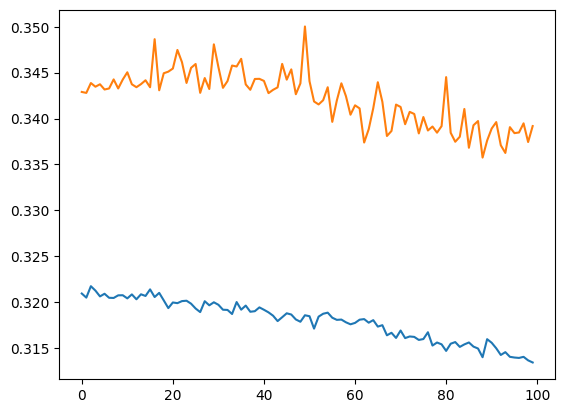

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

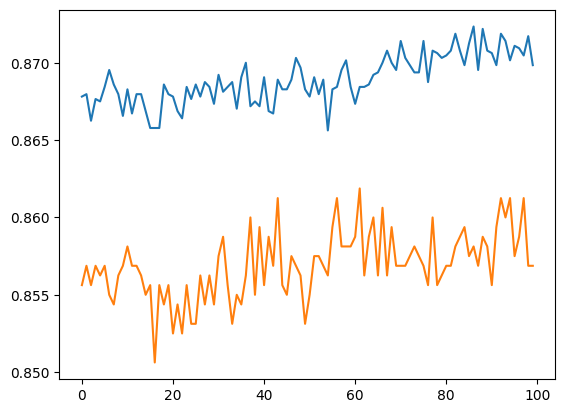

In [92]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])